In [ ]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [1]:

# Step 2: Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to include channel dimension (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.7993 - loss: 0.6253 - val_accuracy: 0.9822 - val_loss: 0.0627
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9683 - loss: 0.1067 - val_accuracy: 0.9880 - val_loss: 0.0435
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9781 - loss: 0.0745 - val_accuracy: 0.9898 - val_loss: 0.0398
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9815 - loss: 0.0587 - val_accuracy: 0.9887 - val_loss: 0.0387
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.9848 - loss: 0.0492 - val_accuracy: 0.9908 - val_loss: 0.0302
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9884 - loss: 0.0324
Test accuracy: 0.9907


In [3]:
# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9884 - loss: 0.0324
Test accuracy: 0.9907


In [25]:
from PIL import Image

# Load your own image
img_path = 'number5.png'  # Change this to your file name
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize to 28x28 if needed
img = img.resize((28, 28))

# Convert to numpy array and invert colors if needed
img_array = np.array(img)

# Optional: Invert colors (if digit is black on white)
img_array = 255 - img_array

# Normalize and reshape for the model
sample = img_array / 255.0
sample = sample.reshape(1, 28, 28, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


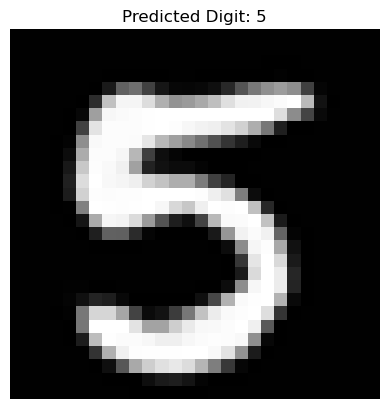

In [27]:
pred = model.predict(sample)
predicted_label = np.argmax(pred)

# Show the image
plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_label}")
plt.axis('off')
plt.show()
